In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing


In [2]:
#Dataset
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"
df=pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
Cat_objetivos=df['custcat'].value_counts() # Contar elementos por clase objetivo

array([[<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'marital'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'ed'}>,
        <Axes: title={'center': 'employ'}>,
        <Axes: title={'center': 'retire'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'reside'}>,
        <Axes: title={'center': 'custcat'}>]], dtype=object)

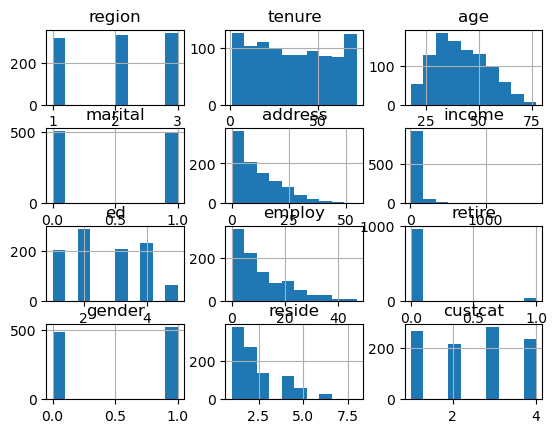

In [4]:
df.hist()#Visualización de histograma de datos

In [5]:
#División de Dataset
from sklearn.model_selection import train_test_split
x=df[['region','tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
y=df['custcat'].values
train_x , test_x, train_y , test_y = train_test_split(x,y,test_size=0.2, random_state=4)
a=train_x.shape
b=train_y.shape

print(f"Shape of x={a} and shape of y={b}")
#Normalización de Datos
train_x_norm= preprocessing.StandardScaler().fit(train_x).transform(train_x.astype(float))
test_x_norm= preprocessing.StandardScaler().fit(test_x).transform(test_x.astype(float))

Shape of x=(800, 11) and shape of y=(800,)


In [6]:
#Importación de modelo
from sklearn.neighbors import KNeighborsClassifier
#Elección de K
k=4

#Entrenamiento de modelo
Model_KNN = KNeighborsClassifier(n_neighbors=k).fit(train_x_norm, train_y)

#Predicción
predict= Model_KNN.predict(test_x_norm)

In [7]:
#Evaluación de desempeño
from sklearn import metrics

print("Precisión del set de entrenamiento:", metrics.accuracy_score(train_y, Model_KNN.predict(train_x_norm)))
print("precisión del set de pruebas: ", metrics.accuracy_score(test_y, predict))

Precisión del set de entrenamiento: 0.5475
precisión del set de pruebas:  0.33


In [8]:
#Elección de K
k=6

#Entrenamiento de modelo
Model_KNN = KNeighborsClassifier(n_neighbors=k).fit(train_x_norm, train_y)

#Predicción
predict= Model_KNN.predict(test_x_norm)

print("Precisión del set de entrenamiento:", metrics.accuracy_score(train_y, Model_KNN.predict(train_x_norm)))
print("precisión del set de pruebas: ", metrics.accuracy_score(test_y, predict))

Precisión del set de entrenamiento: 0.5125
precisión del set de pruebas:  0.335


In [9]:
#Elección de K
k=7

#Entrenamiento de modelo
Model_KNN = KNeighborsClassifier(n_neighbors=k).fit(train_x_norm, train_y)

#Predicción
predict= Model_KNN.predict(test_x_norm)

print("Precisión del set de entrenamiento:", metrics.accuracy_score(train_y, Model_KNN.predict(train_x_norm)))
print("precisión del set de pruebas: ", metrics.accuracy_score(test_y, predict))

Precisión del set de entrenamiento: 0.50875
precisión del set de pruebas:  0.35


In [10]:
#Elección de K
k=8

#Entrenamiento de modelo
Model_KNN = KNeighborsClassifier(n_neighbors=k).fit(train_x_norm, train_y)

#Predicción
predict= Model_KNN.predict(test_x_norm)

print("Precisión del set de entrenamiento:", metrics.accuracy_score(train_y, Model_KNN.predict(train_x_norm)))
print("precisión del set de pruebas: ", metrics.accuracy_score(test_y, predict))

Precisión del set de entrenamiento: 0.4925
precisión del set de pruebas:  0.34


In [11]:
print("El mejor desempeño se da para k=7, obteniendo un 35% de precisión en el set de pruebas")

El mejor desempeño se da para k=7, obteniendo un 35% de precisión en el set de pruebas


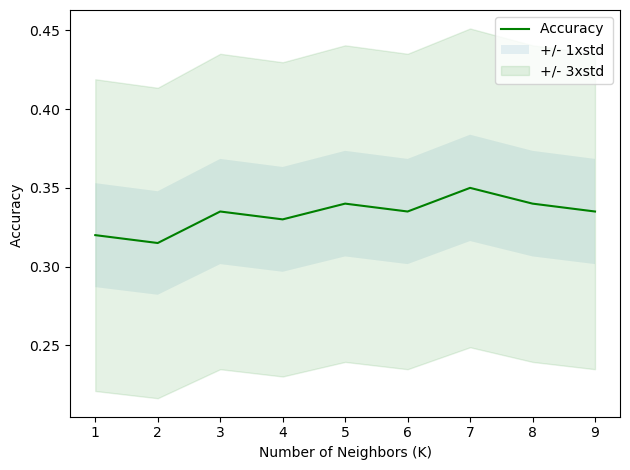

In [13]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Entrenamiento de modelo
    Model_KNN = KNeighborsClassifier(n_neighbors=n).fit(train_x_norm, train_y)

    #Predicción
    predict= Model_KNN.predict(test_x_norm)
    
    
    mean_acc[n-1] = metrics.accuracy_score(test_y, predict)

    
    std_acc[n-1]=np.std(predict==test_y)/np.sqrt(predict.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()